<img src="assets/NovaLogo.png" style="width: 15%; float:right; margin: 10px 2% 0px 0px;min-width:128px;" alt="Nova SBE Logo">
<style>
    *p { line-height: 140%; }
</style>

# Financial Modelling Group Project
#### **Nova School of Business and Economics** <br>
**Masters in Finance** <br>
*Professor Pedro Souto* <br>
1st October 2023 <br>
Fall 2023

---
**Authors:**
Bernardo Henriques - 47177 | Daniel Gonçalves - 47264 | Inês Ribeiro - 59124 | José Soares - 46812 | Mafalda Tavares - 46802

## Imports

In [17]:
import pandas as pd
import yfinance as yf
import logging
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from IPython.display import HTML

from sklearn import tree
from sklearn.metrics import confusion_matrix

warnings.filterwarnings("ignore")
sns.set_style("darkgrid")
logging.getLogger('yfinance').setLevel(logging.CRITICAL)

## Data Collection
#### Collecting SPY and IEI from Yahoo Finance Website: <br>

In [18]:
# Using tickers
tickers = ["SPY","IEI"]

stock_data = yf.download(tickers,actions=True,progress=False,start="2007-01-01")
stock_data.head()

Adj Close             Capital Gains      Close               
                 IEI         SPY           IEI  SPY   IEI         SPY   
Date                                                                    
2007-01-03       NaN  102.265015           NaN  0.0   NaN  141.369995  \
2007-01-04       NaN  102.482048           NaN  0.0   NaN  141.669998   
2007-01-05       NaN  101.664635           NaN  0.0   NaN  140.539993   
2007-01-08       NaN  102.134827           NaN  0.0   NaN  141.190002   
2007-01-09       NaN  102.048027           NaN  0.0   NaN  141.070007   

           Dividends      High             Low             Open               
                 IEI  SPY  IEI         SPY IEI         SPY  IEI         SPY   
Date                                                                          
2007-01-03       NaN  0.0  NaN  142.860001 NaN  140.570007  NaN  142.250000  \
2007-01-04       NaN  0.0  NaN  142.050003 NaN  140.610001  NaN  141.229996   
2007-01-05       NaN  0.0  NaN  141.399994 NaN  140.380005  NaN  141.330002   
2007-01-08       NaN  0.0  NaN  141.410004 NaN  140.250000  NaN  140.820007   
2007-01-09       NaN  0.0  NaN  141.600006 NaN  140.399994  NaN  141.309998   

           Stock Splits      Volume            
                    IEI  SPY    IEI       SPY  
Date                                           
2007-01-03          NaN  0.0    NaN  94807600  
2007-01-04          NaN  0.0    NaN  69620600  
2007-01-05          NaN  0.0    NaN  76645300  
2007-01-08          NaN  0.0    NaN  71655000  
2007-01-09          NaN  0.0    NaN  75680100

## Data Cleaning

In [19]:
stock_data_cleaned = stock_data.dropna()
stock_data_cleaned.head()

Adj Close             Capital Gains           Close               
                  IEI         SPY           IEI  SPY        IEI         SPY   
Date                                                                          
2007-01-11  74.227310  102.836472           0.0  0.0  99.919998  142.160004  \
2007-01-12  74.234665  103.617752           0.0  0.0  99.930000  143.240005   
2007-01-16  74.160393  103.415192           0.0  0.0  99.830002  142.960007   
2007-01-17  74.153008  103.458641           0.0  0.0  99.820000  143.020004   
2007-01-18  74.219879  103.111382           0.0  0.0  99.910004  142.539993   

           Dividends             High                    Low               
                 IEI  SPY         IEI         SPY        IEI         SPY   
Date                                                                       
2007-01-11       0.0  0.0  100.000000  142.619995  99.919998  141.500000  \
2007-01-12       0.0  0.0   99.930000  143.240005  99.849998  142.110001   
2007-01-16       0.0  0.0   99.830002  143.440002  99.830002  142.729996   
2007-01-17       0.0  0.0   99.940002  143.460007  99.809998  142.729996   
2007-01-18       0.0  0.0   99.910004  143.259995  99.839996  142.309998   

                  Open             Stock Splits       Volume            
                   IEI         SPY          IEI  SPY     IEI       SPY  
Date                                                                    
2007-01-11  100.000000  141.580002          0.0  0.0  1100.0  54476800  
2007-01-12   99.879997  142.149994          0.0  0.0  1500.0  55370600  
2007-01-16   99.830002  143.070007          0.0  0.0   600.0  44871300  
2007-01-17   99.940002  142.850006          0.0  0.0   700.0  50241400  
2007-01-18   99.839996  143.169998          0.0  0.0  6200.0  68177300

## Exploratory Analysis


Adj Close              Capital Gains                Close   
               IEI          SPY           IEI     SPY          IEI   
count  4209.000000  4209.000000        4209.0  4209.0  4209.000000  \
mean    106.613863   203.437799           0.0     0.0   119.881459   
std      13.340135   113.702869           0.0     0.0     7.637826   
min      73.937569    51.386780           0.0     0.0    98.349998   
25%      98.439156   105.390266           0.0     0.0   115.199997   
50%     109.162865   175.609512           0.0     0.0   121.500000   
75%     114.085770   269.129425           0.0     0.0   123.940002   
max     129.029648   464.923401           0.0     0.0   134.100006   

                     Dividends                      High                
               SPY         IEI          SPY          IEI          SPY   
count  4209.000000  4209.00000  4209.000000  4209.000000  4209.000000  \
mean    226.888351     0.00823     0.016501   120.035369   228.188738   
std     107.091300     0.04147     0.137627     7.655122   107.641279   
min      68.110001     0.00000     0.000000    98.550003    70.000000   
25%     136.889999     0.00000     0.000000   115.370003   137.639999   
50%     204.059998     0.00000     0.000000   121.639999   204.940002   
75%     289.970001     0.00000     0.000000   124.040001   291.279999   
max     477.709991     0.72500     1.781000   169.690002   479.980011   

               Low                      Open              Stock Splits   
               IEI          SPY          IEI          SPY          IEI   
count  4209.000000  4209.000000  4209.000000  4209.000000       4209.0  \
mean    119.735213   225.416731   119.875607   226.863723          0.0   
std       7.667039   106.461098     7.640063   107.073139          0.0   
min      98.330002    67.099998    98.400002    67.949997          0.0   
25%     114.970001   136.050003   115.180000   136.910004          0.0   
50%     121.389999   202.929993   121.510002   204.059998          0.0   
75%     123.860001   288.869995   123.949997   290.160004          0.0   
max     133.990005   476.059998   134.009995   479.220001          0.0   

                     Volume                
          SPY           IEI           SPY  
count  4209.0  4.209000e+03  4.209000e+03  
mean      0.0  6.366830e+05  1.376142e+08  
std       0.0  1.476307e+06  9.486120e+07  
min       0.0  2.000000e+02  2.027000e+07  
25%       0.0  1.093000e+05  7.377860e+07  
50%       0.0  2.732000e+05  1.077431e+08  
75%       0.0  7.273000e+05  1.694662e+08  
max       0.0  4.288380e+07  8.710263e+08

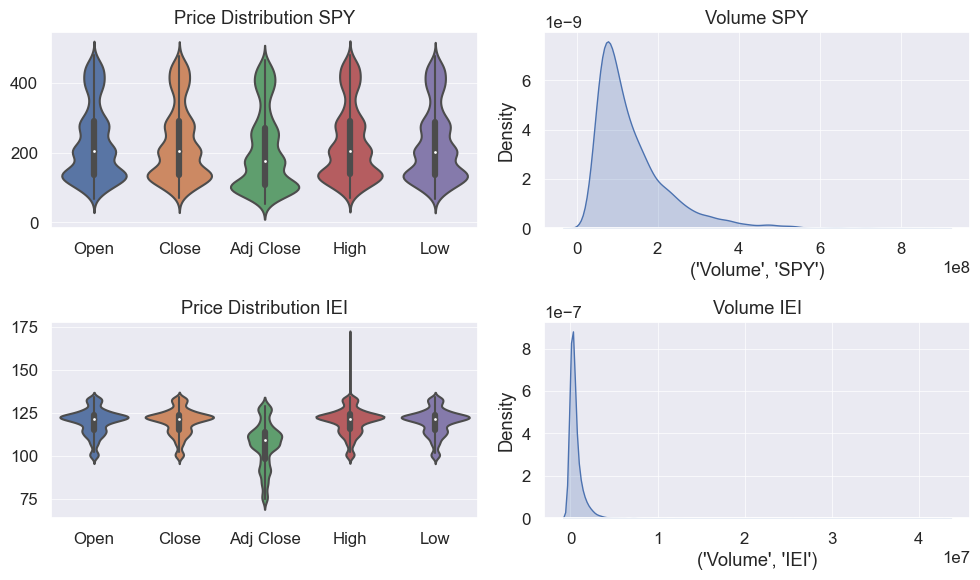

In [20]:
display(stock_data_cleaned.describe())

prices = stock_data_cleaned.loc[:,["Open", "Close", "Adj Close", "High", "Low"]]

fig, axs = plt.subplots(2,2)
for ticker, ax in zip(["SPY","IEI"],axs):
    sns.violinplot(data=prices.swaplevel(axis=1)[ticker],ax=ax[0])
    ax[0].set_title(f"Price Distribution {ticker}")
    sns.kdeplot(data=stock_data_cleaned[("Volume",ticker)],ax=ax[1],fill=True)
    ax[1].set_title(f"Volume {ticker}")
plt.tight_layout()
plt.show()



### Exponential Moving Averages

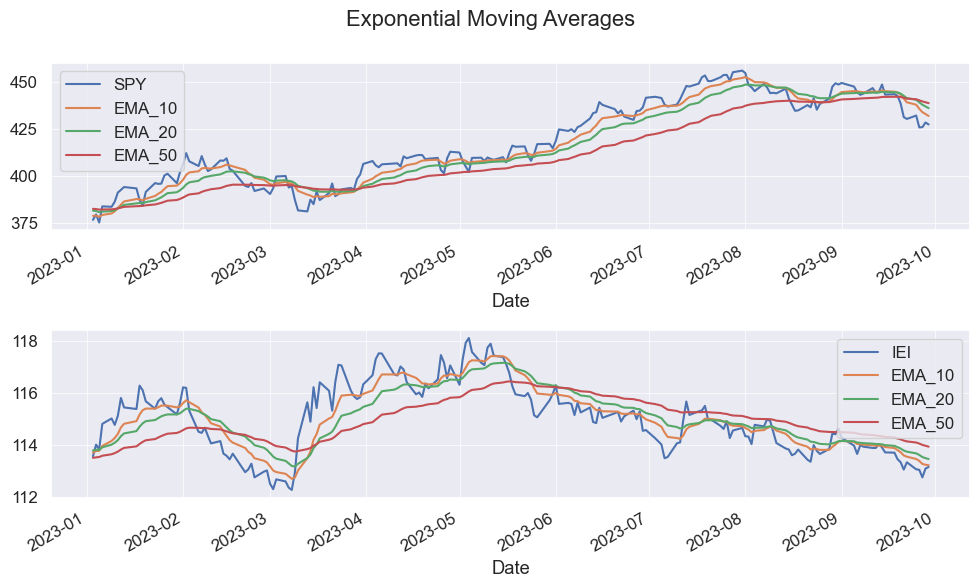

In [21]:
prices_ema = prices.loc[:,prices.columns.get_level_values(level=0)=="Adj Close"].copy()

prices_ema[[("EMA_10","IEI"),("EMA_10","SPY")]] = prices["Adj Close"].ewm(span=10).mean()
prices_ema[[("EMA_20","IEI"),("EMA_20","SPY")]] = prices["Adj Close"].ewm(span=20).mean()
prices_ema[[("EMA_50","IEI"),("EMA_50","SPY")]] = prices["Adj Close"].ewm(span=50).mean()

fig, axs = plt.subplots(2,1)
prices_ema.dropna().swaplevel(axis=1).loc["20230101":,"SPY"].rename({"Adj Close":"SPY"},axis=1).plot(ax=axs[0])
prices_ema.dropna().swaplevel(axis=1).loc["20230101":,"IEI"].rename({"Adj Close":"IEI"},axis=1).plot(ax=axs[1])
plt.suptitle("Exponential Moving Averages")
plt.tight_layout()
plt.show()

### Tree Training

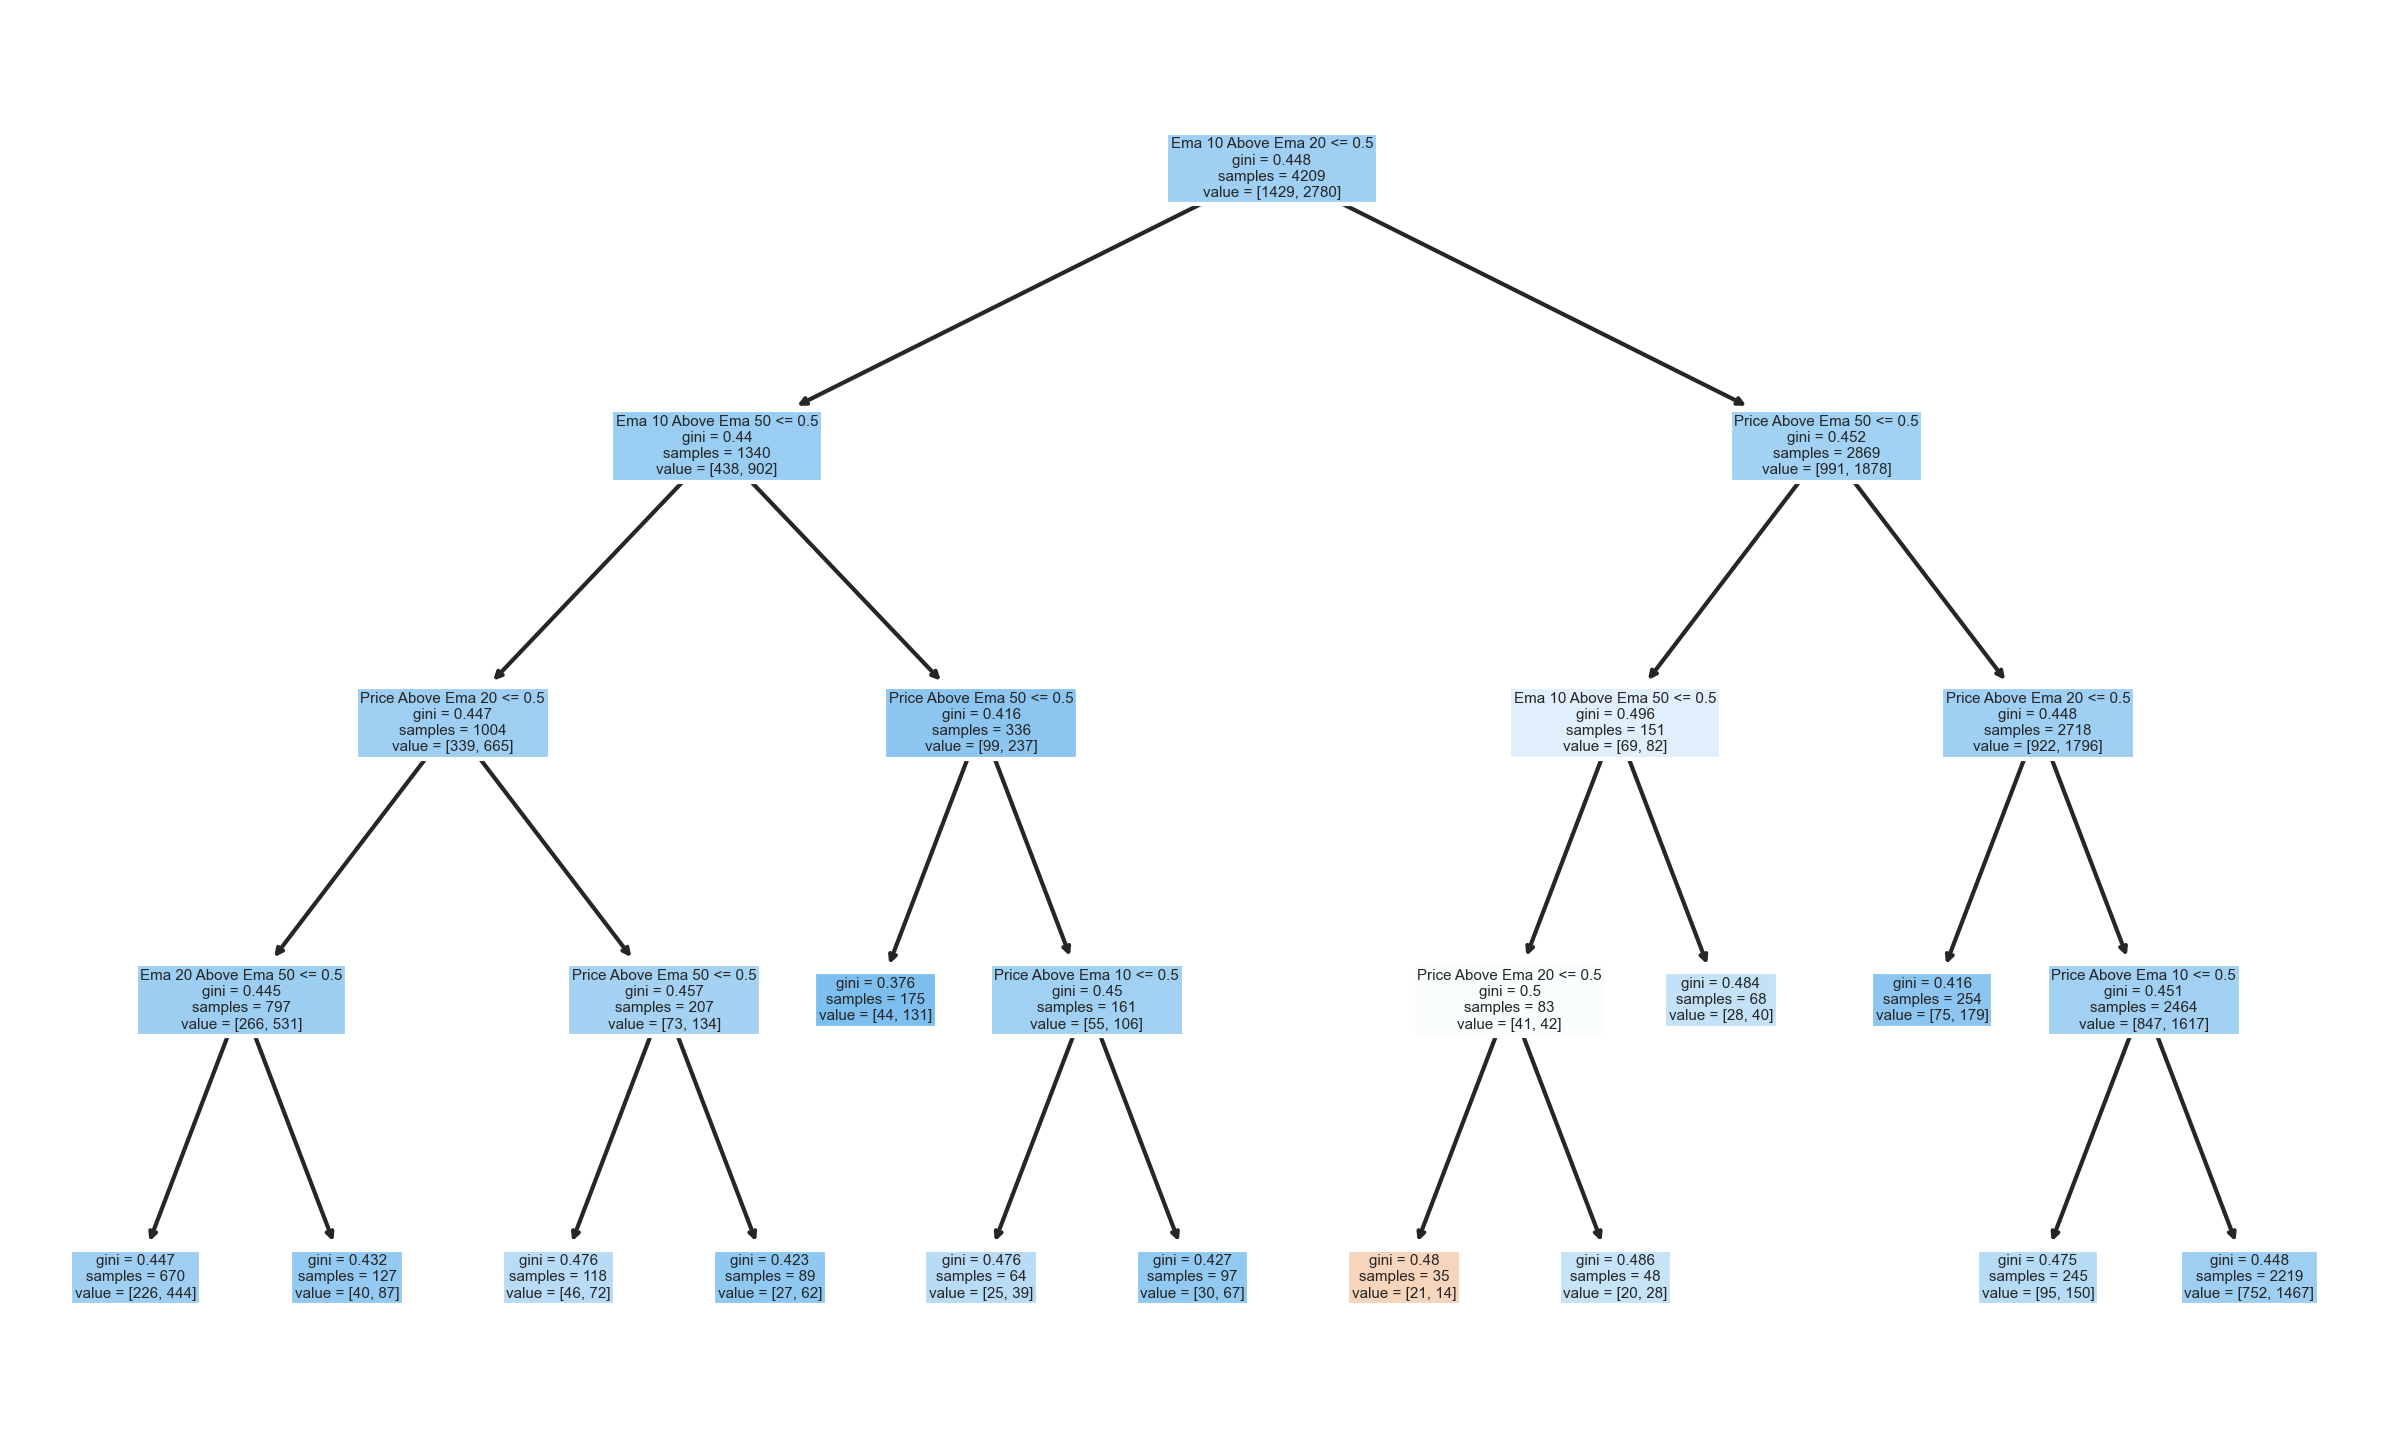

Predicted         
                 Negative Positive
Actual Negative        21     1408
       Positive        14     2766

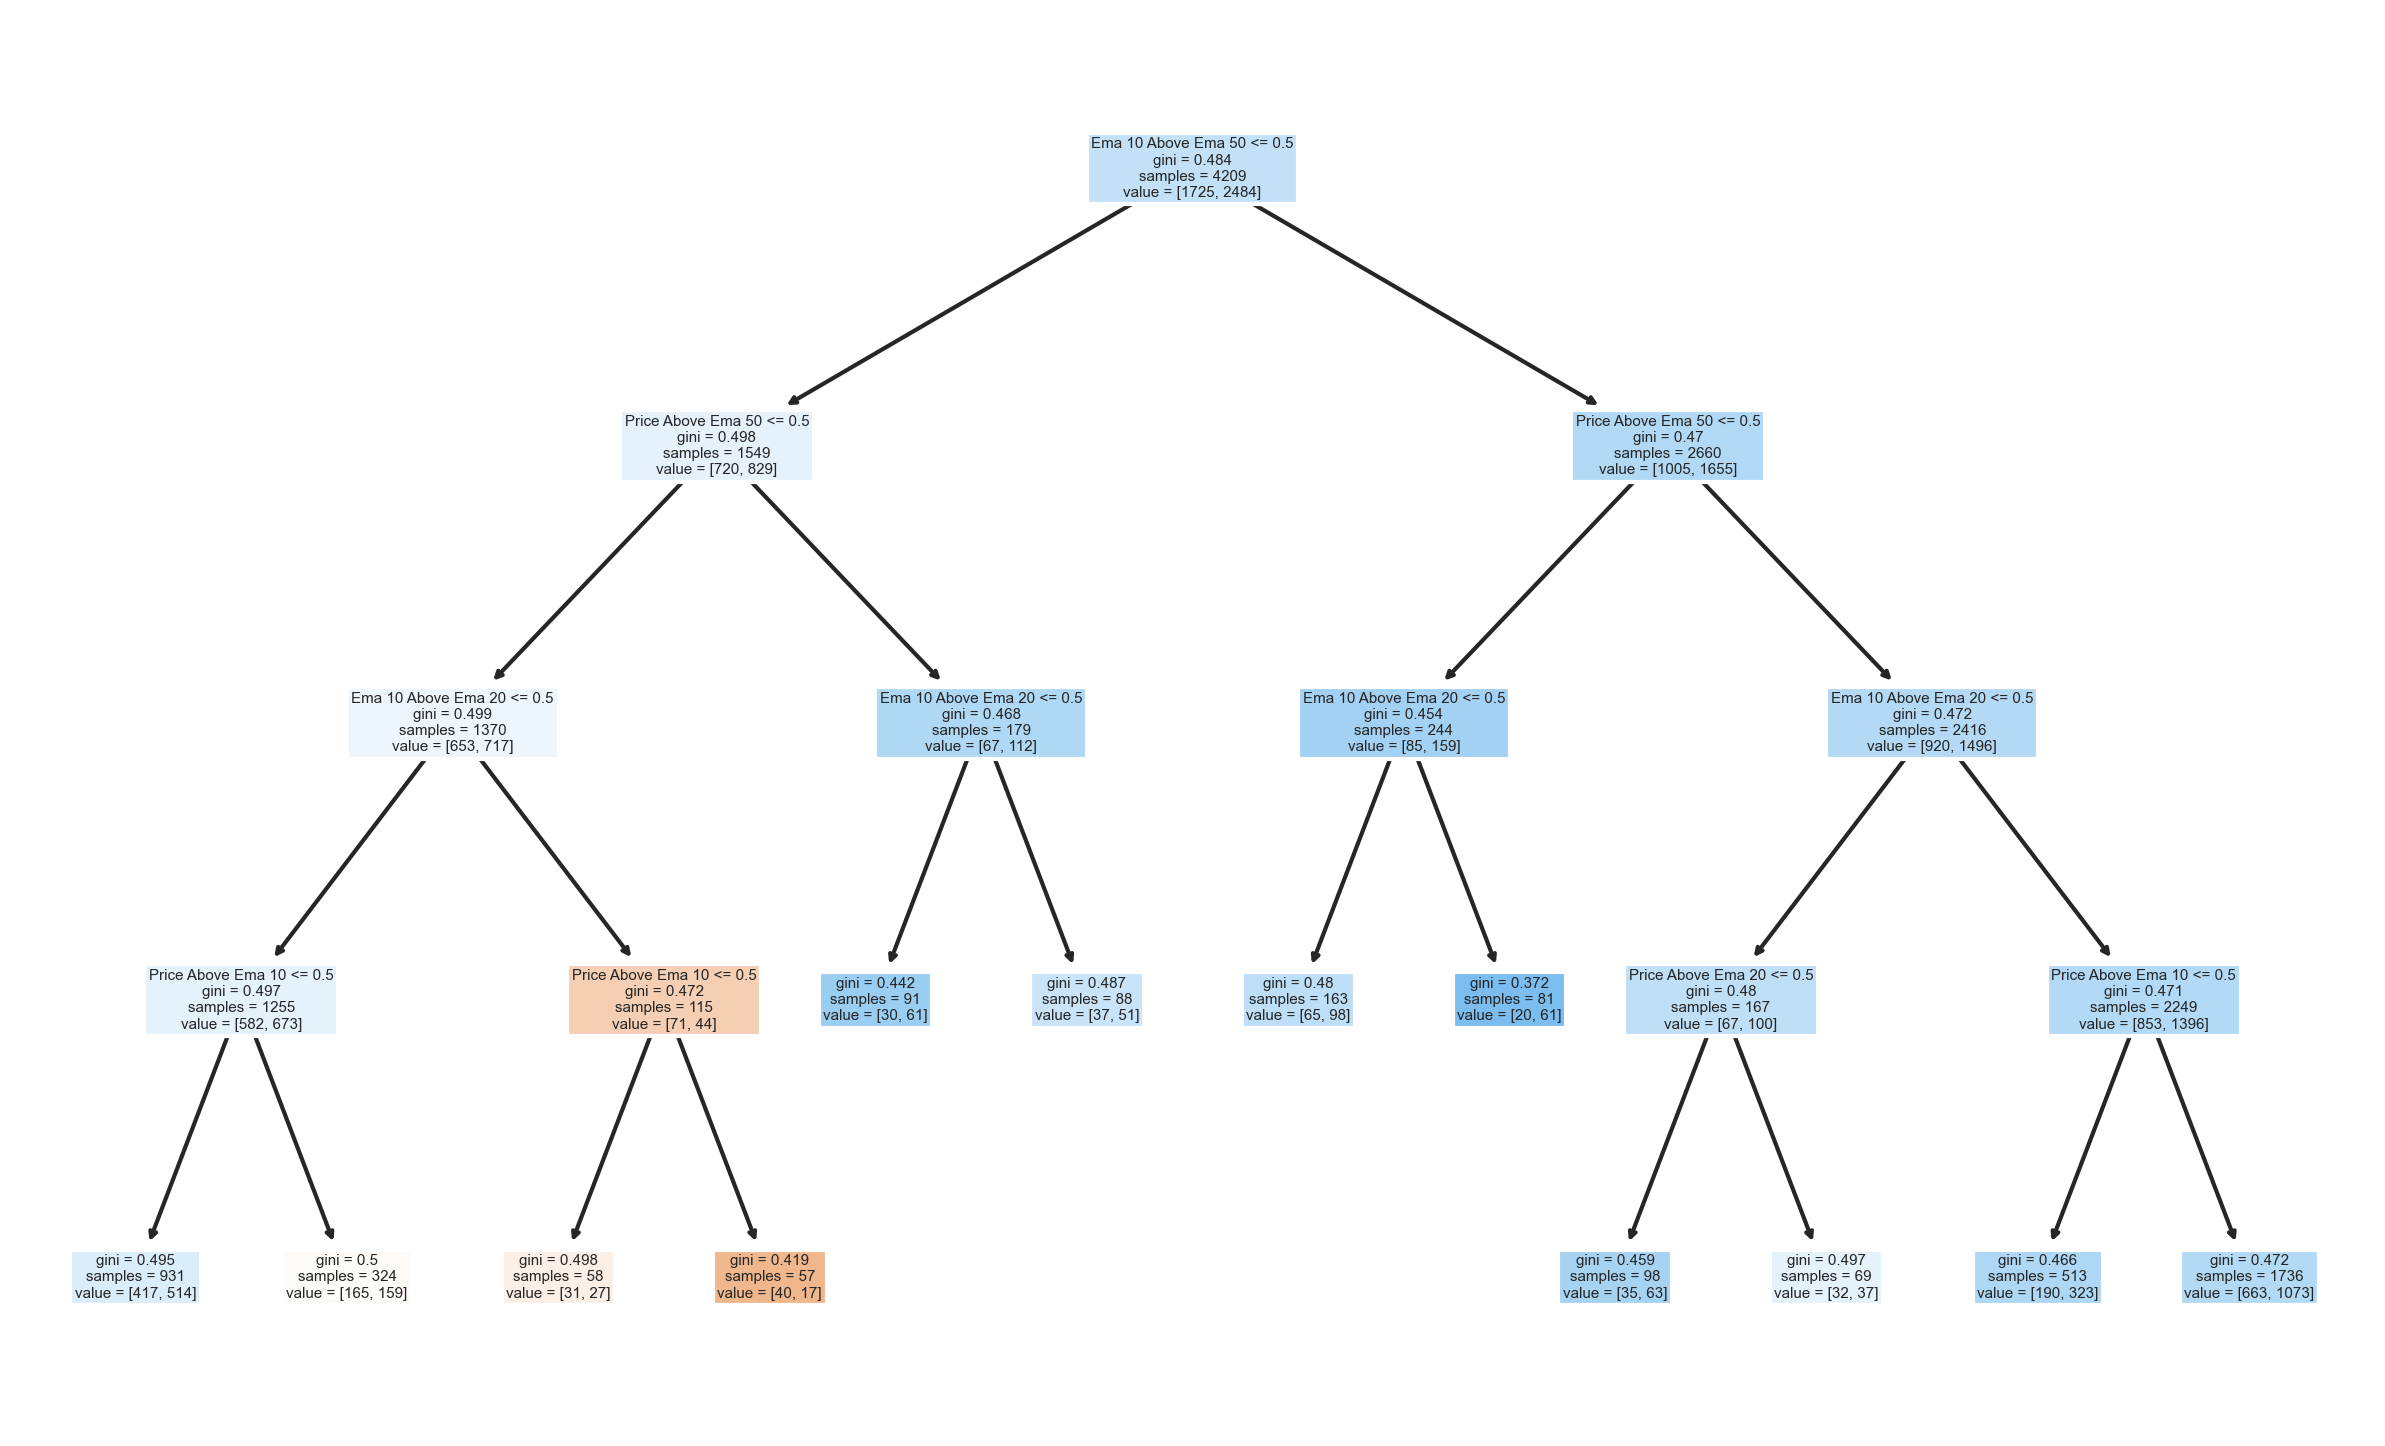

Predicted         
                 Negative Positive
Actual Negative       236     1489
       Positive       203     2281

In [22]:
days = 25
spx_order_book = prices[("Adj Close", "SPY")].rename("Close_Price")
iei_order_book = prices[("Adj Close", "IEI")].rename("Close_Price")

for ticker, prices_ in (("SPX", spx_order_book), ("IEI",iei_order_book)):   
    display(HTML(f"<h2>{ticker}</h2><hr>"))  
    days_returns = (prices_.shift(-days) / prices_) - 1
    Y_df = (days_returns > 0).astype(int).rename("Y")

    # Creating the Design Matrix of Exponential Moving Average Crossings
    prices_ma = prices_.copy(deep=True).to_frame()
    prices_ma["EMA_10"] = prices_.ewm(span=10, ignore_na=True).mean()
    prices_ma["EMA_20"] = prices_.ewm(span=20, ignore_na=True).mean()
    prices_ma["EMA_50"] = prices_.ewm(span=50, ignore_na=True).mean()
    prices_ma.dropna(inplace=True)

    # Creating the Dummies
    price_above_ema_10 = prices_ma["Close_Price"] > prices_ma["EMA_10"]  
    price_above_ema_20 = prices_ma["Close_Price"] > prices_ma["EMA_20"]
    price_above_ema_50 = prices_ma["Close_Price"] > prices_ma["EMA_50"]  
    ema_10_above_ema_20 = prices_ma["EMA_10"] > prices_ma["EMA_20"]
    ema_10_above_ema_50 = prices_ma["EMA_10"] > prices_ma["EMA_50"]
    ema_20_above_ema_50 = prices_ma["EMA_20"] > prices_ma["EMA_50"]

    ma_dummies = {
    "price_above_ema_10"  :price_above_ema_10 ,
    "price_above_ema_20" :price_above_ema_20, 
    "price_above_ema_50" :price_above_ema_50, 
    "ema_10_above_ema_20" :ema_10_above_ema_20, 
    "ema_10_above_ema_50" :ema_10_above_ema_50, 
    "ema_20_above_ema_50":ema_20_above_ema_50,
    }

    X_df = pd.DataFrame()
    for k, v in ma_dummies.items():
        s = v.rename(k)
        X_df = pd.concat([X_df, s],axis=1)

    X_df = X_df.sort_index(axis=1).astype(int)

    # Alligning Y and X
    data = pd.concat([X_df,Y_df],axis = 1).dropna()
    X_ticker = data.drop("Y",axis=1)
    Y_ticker = data["Y"]

    # Fitting the Decision Tree
    tree_ma = tree.DecisionTreeClassifier(min_samples_leaf = 30,max_depth=4)
    tree_ma = tree_ma.fit(X_ticker, Y_ticker)

    plt.figure(dpi=300)
    plot = tree.plot_tree(tree_ma,feature_names=X_ticker.columns.str.title().str.replace("_"," "),filled = True)
    plt.show()

    #RocCurveDisplay.from_estimator(tree_ma, X_ticker, Y_ticker)
    confus_matrix = pd.DataFrame(data=confusion_matrix(Y_ticker,tree_ma.predict(X_ticker)),
                            columns=pd.MultiIndex.from_product(
                                [['Predicted'], ['Negative', 'Positive']]),
                            index=pd.MultiIndex.from_product([['Actual'], ['Negative', 'Positive']]))
    display(confus_matrix)